# Final Project: Understanding AI Assistant Usage Patterns in Academic Settings

## Group Members
- Issar Manknojiya
- Josh Cini
- Zachary Goodman

## Project Overview
AI assistants such as ChatGPT and other large language models are rapidly becoming embedded in students' day-to-day academic workflows. From drafting essays and debugging code to summarizing readings and preparing for exams, these tools are reshaping how students learn, seek help, and complete assignments.

However, despite their growing presence, there is still limited empirical understanding of *how* students actually interact with AI assistants, what makes a session feel successful or unsuccessful, and which factors drive satisfaction and continued use. Our project addresses this gap by analyzing detailed usage data from student-AI interactions.

## Problem Statement
**Problem Statement: Understanding AI Assistant Usage Patterns in Academic Settings**

Given the rapid adoption of AI assistants in educational environments, there is a critical need to understand usage patterns across different academic contexts. We seek to answer questions such as:
- Which session characteristics are most strongly associated with high student satisfaction?
- How do usage patterns differ by academic level (e.g., undergraduate vs. graduate) and discipline (e.g., STEM vs. humanities)?
- What distinguishes a "successful" AI assistant session from an "unsuccessful" one?

By modeling these patterns, we aim to provide insights that can inform the design of more effective educational technologies and AI-supported learning experiences.

## Dataset
We use the **AI Assistant Usage in Student Life** dataset, which contains **10,000 synthetic student sessions**. Each session captures information such as:
- Academic level and discipline
- Task type (e.g., writing, coding, studying, brainstorming)
- Session length and number of prompts
- Perceived assistance quality and task complexity
- Student satisfaction rating and indicators of session success.

This dataset allows us to explore both individual session characteristics and broader behavioral patterns across many students and contexts.

## Proposed Analysis
Our analysis will focus on three main goals:

1. **Predict student satisfaction ratings**
   - Use session-level features (academic level, discipline, task type, session length, prompt count, etc.) to model and predict satisfaction scores.

2. **Classify successful vs. unsuccessful sessions**
   - Build classification models that distinguish sessions labeled as successful vs. unsuccessful using features such as assistance quality, task complexity, and interaction patterns.

3. **Analyze usage patterns across student groups**
   - Compare usage behaviors across academic disciplines and student levels to identify where AI assistants are most and least effective, and where there may be opportunities for targeted optimization.

## Machine Learning Approach
To address these goals, we plan to implement the following machine learning methods:

- **Supervised Classification Models**
  - Random Forest
  - Support Vector Machine (SVM)
  - Logistic Regression

  These models will be used to predict student satisfaction levels and classify session outcomes (successful vs. unsuccessful). We will evaluate their performance using metrics such as accuracy, precision, recall, F1-score, and confusion matrices.

- **Unsupervised Clustering**
  - K-means clustering
  - Hierarchical clustering

  Clustering will help us discover distinct user behavior segments (e.g., heavy users, quick problem solvers, exploratory learners) based on interaction features and session characteristics.

## Expected Impact
By combining predictive modeling and behavioral clustering, our project aims to:
- Identify the key drivers of positive and negative AI-assisted learning experiences.
- Reveal how usage patterns differ across disciplines and academic levels.
- Provide data-driven recommendations for improving AI assistant design, guidance, and integration into coursework.

Ultimately, these insights could help educators, instructional designers, and AI tool developers better support students in using AI assistants responsibly, effectively, and equitably in academic settings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.decomposition import PCA

from xgboost import XGBClassifier

import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.nn.functional as F
import torch.nn.utils as utils

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# 1. Data Loading and Exploration

[This Kaggle dataset](https://www.kaggle.com/datasets/ayeshasal89/ai-assistant-usage-in-student-life-synthetic) contains a **synthetic dataset of AI assistant usage in student life**. Each row represents a single AI-assisted academic session and records how a student interacted with an AI tool such as ChatGPT.\n",


#### 1. Loading our Data
Load the train data into a pandas DataFrames. Display the first few rows **of each DataFrame** and print the shape of the dataframe.

In [2]:
file_path = 'ai_assistant_usage_student_life.csv'
df = pd.read_csv(file_path)

#### 2. Checking for Null Values & Shape

Check for null values and shape in the training data.

In [3]:
print("Shape of DataFrame:", df.shape)

df.head()
df.isnull().sum()

Shape of DataFrame: (10000, 11)


SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

# 2. Exploratory Data Analysis (EDA)

##### 1. Visualize the Target Variable

First, check if your classes are balanced. If "Assignment Completed" is very rare, your model might struggle (a class imbalance problem).

/var/folders/_s/tww7z6ld4bb42wxgx_ss72hc0000gn/T/ipykernel_58291/1875675265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='FinalOutcome', data=df, order=df['FinalOutcome'].value_counts().index, palette='viridis')


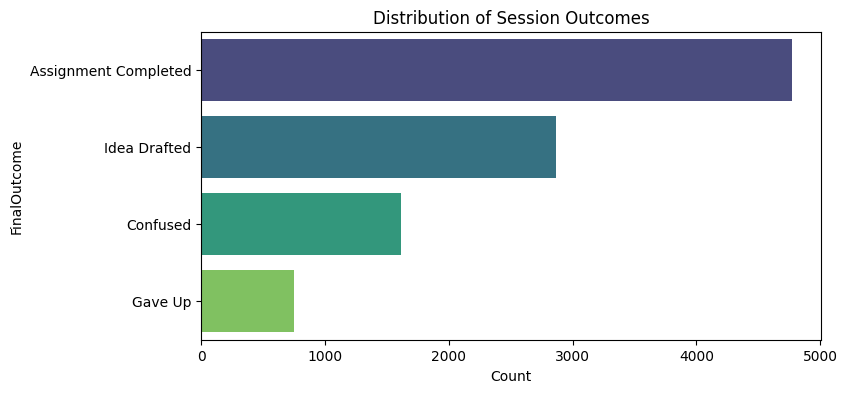

In [4]:
# Check distribution of the raw target variable
plt.figure(figsize=(8, 4))
sns.countplot(y='FinalOutcome', data=df, order=df['FinalOutcome'].value_counts().index, palette='viridis')
plt.title('Distribution of Session Outcomes')
plt.xlabel('Count')
plt.show()

#### 2. Visualize Key Numerical Distributions

Understanding the shape of the data helps decide if we need scaling (StandardScaler) or normalization.

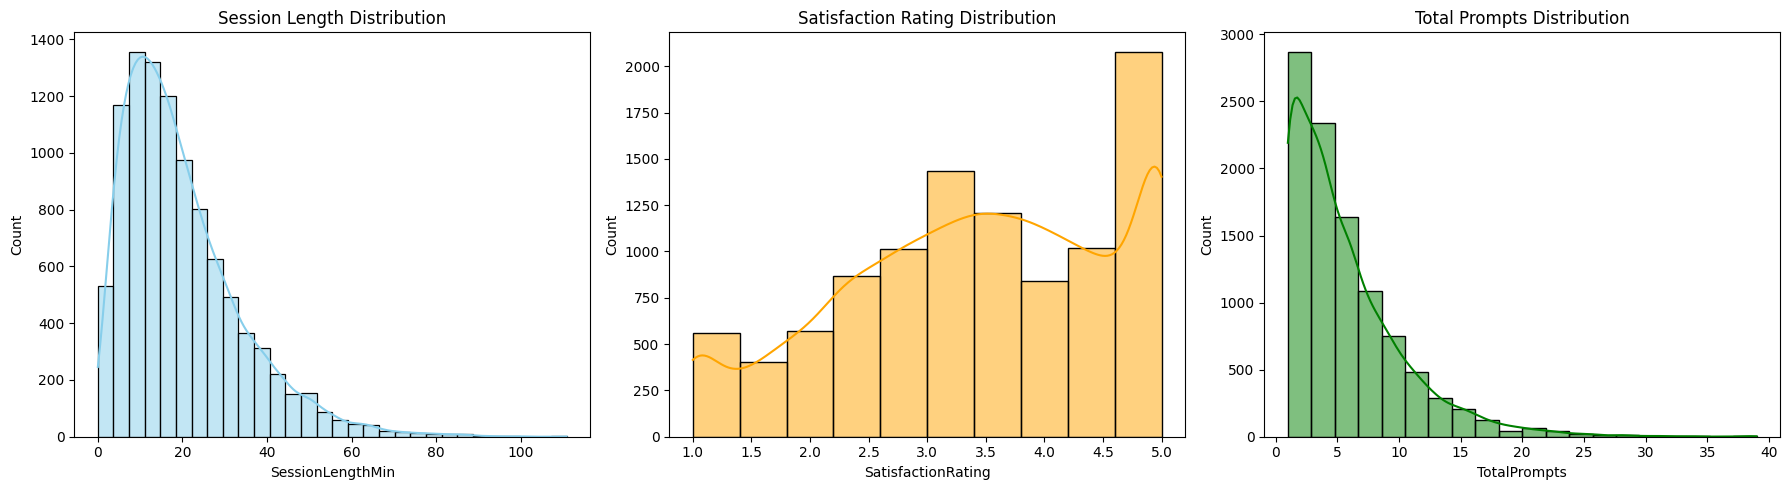

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Session Length
sns.histplot(df['SessionLengthMin'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Session Length Distribution')

# Satisfaction
sns.histplot(df['SatisfactionRating'], bins=10, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Satisfaction Rating Distribution')

# Prompts
sns.histplot(df['TotalPrompts'], bins=20, kde=True, ax=axes[2], color='green')
axes[2].set_title('Total Prompts Distribution')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='TaskType', order=df['TaskType'].value_counts().index)
plt.title("Distribution of Task Types")
plt.xlabel("Task Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='AI_AssistanceLevel', order=df['AI_AssistanceLevel'].value_counts().index)
plt.title("Distribution of Assistance Levels")
plt.xlabel("Assistance Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Discipline', order=df['Discipline'].value_counts().index)
plt.title("Distribution of Academic Disciplines")
plt.xlabel("Discipline")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3. Correlation Heatmap

This checks for "multicollinearity" (features that are too similar) and sees which features correlate most with Success (IsProductive).

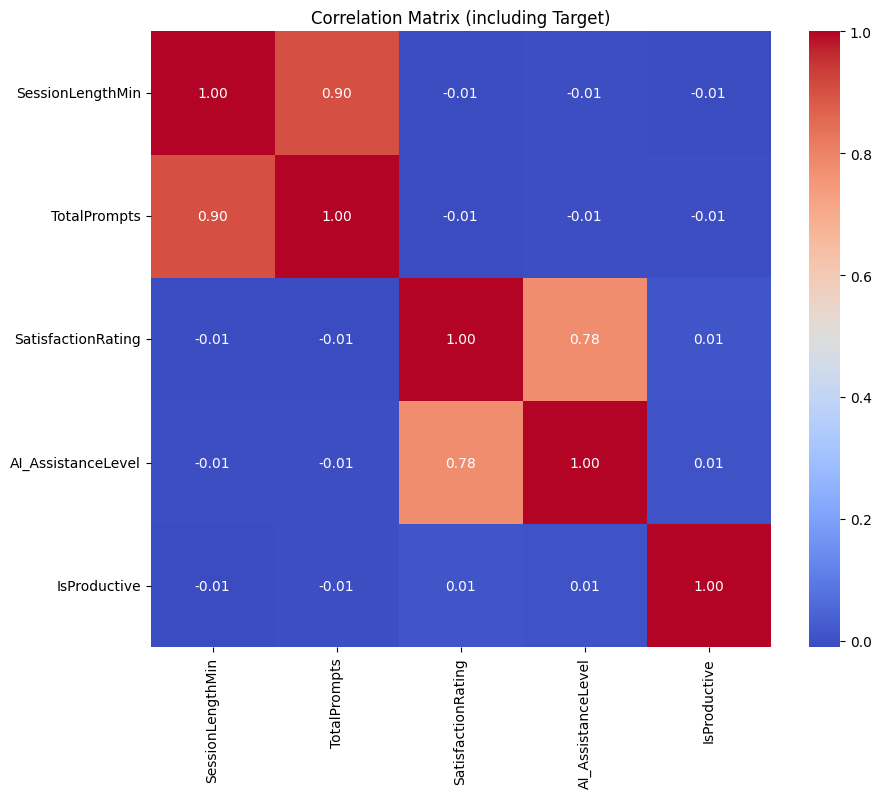

In [6]:
# 1. Light Preprocessing for EDA
# We need to create the target variable NOW so we can visualize it.
# This adds the 'IsProductive' column to your dataframe immediately.
df['IsProductive'] = (df['FinalOutcome'] == 'Assignment Completed').astype(int)

# 2. Select only numerical columns for the heatmap
# We filter the dataframe to only include numbers, or else the correlation function will crash.
numeric_cols = ['SessionLengthMin', 'TotalPrompts', 'SatisfactionRating', 'AI_AssistanceLevel', 'IsProductive']
eda_subset = df[numeric_cols]

# 3. Create the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(eda_subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (including Target)')
plt.show()

# 2. Feature Engineering

In this section, we construct new variables that better capture the notion of a “productive” session and contextual factors (e.g., term vs. non‑term), which should help downstream models.


##### 3.1 Define a composite productivity label (productive)

We define `productive` as sessions where the outcome is either "Assignment Completed" or "Idea Drafted" **and** the `SatisfactionRating` is greater than 3. This binary label captures both objective success and the student’s subjective satisfaction with the AI‑assisted session.


In [7]:
productive_outcomes = ["Assignment Completed", "Idea Drafted"]

df['productive'] = (
    df['FinalOutcome'].isin(productive_outcomes) &
    (df['SatisfactionRating'] > 3)
).astype(int)

print(df['productive'].value_counts())
print(df[['FinalOutcome', 'productive']].head(20))

productive
0    5162
1    4838
Name: count, dtype: int64
            FinalOutcome  productive
0   Assignment Completed           0
1   Assignment Completed           0
2   Assignment Completed           1
3   Assignment Completed           1
4   Assignment Completed           0
5           Idea Drafted           1
6   Assignment Completed           0
7   Assignment Completed           1
8   Assignment Completed           1
9   Assignment Completed           0
10  Assignment Completed           0
11  Assignment Completed           1
12          Idea Drafted           1
13          Idea Drafted           1
14  Assignment Completed           1
15          Idea Drafted           0
16              Confused           0
17              Confused           0
18  Assignment Completed           1
19  Assignment Completed           1


#### 3.2 Time‑based features: term vs. non‑term

We convert `SessionDate` to a datetime, extract the month, and create an `InSchoolTerm` indicator that is 1 for Fall/Winter months (Jan–Apr, Sep–Dec) and 0 for Summer (May–Aug). This helps us analyze whether AI usage and productivity differ between regular academic terms and break periods.


In [8]:
df['SessionDate'] = pd.to_datetime(df['SessionDate'])

# Extract month
df['SessionMonth'] = df['SessionDate'].dt.month

# Define "school term"
# Fall (Sept–Dec) OR Winter (Jan–Apr) = True
# Summer (May–Aug) = False
df['InSchoolTerm'] = df['SessionMonth'].isin([1, 2, 3, 4, 9, 10, 11, 12]).astype(int)

# Sanity check
print(df[['SessionDate', 'SessionMonth', 'InSchoolTerm']].head(20))

   SessionDate  SessionMonth  InSchoolTerm
0   2024-11-03            11             1
1   2024-08-25             8             0
2   2025-01-12             1             1
3   2025-05-06             5             0
4   2025-03-18             3             1
5   2025-01-17             1             1
6   2024-09-07             9             1
7   2024-12-26            12             1
8   2025-06-18             6             0
9   2025-04-14             4             1
10  2025-02-24             2             1
11  2024-11-07            11             1
12  2024-07-05             7             0
13  2024-11-03            11             1
14  2025-05-21             5             0
15  2024-11-22            11             1
16  2025-04-27             4             1
17  2025-04-13             4             1
18  2024-12-08            12             1
19  2024-08-03             8             0


#### 3.3 Interaction‑intensity and discipline features  

We engineer interaction‑level metrics (e.g., prompts per minute, effort scores) and a STEM vs. non‑STEM discipline grouping.


In [9]:
# Prompts per minute
df['PromptsPerMinute'] = df['TotalPrompts'] / df['SessionLengthMin'].replace(0, np.nan)
df['PromptsPerMinute'] = df['PromptsPerMinute'].fillna(0)

df['AI_LoadRatio'] = df['AI_AssistanceLevel'] / df['TotalPrompts'].replace(0, np.nan)
df['AI_LoadRatio'] = df['AI_LoadRatio'].fillna(0)   # If no prompts, ratio = 0

# Student Effort Score: How many prompts needed per unit AI capability
df['StudentEffort'] = df['TotalPrompts'] / df['AI_AssistanceLevel'].replace(0, np.nan)
df['StudentEffort'] = df['StudentEffort'].fillna(0)  # If AI_AssistanceLevel = 0, effort = 0

# Example STEM vs non-STEM grouping based on Discipline
stem_disciplines = {'Computer Science', 'Engineering', 'Mathematics', 'Physics', 'Biology', 'Chemistry'}
df['DisciplineGroup'] = np.where(df['Discipline'].isin(stem_disciplines), 'STEM', 'Non-STEM')

print(df.head(20))

       SessionID   StudentLevel        Discipline SessionDate  \
0   SESSION00001  Undergraduate  Computer Science  2024-11-03   
1   SESSION00002  Undergraduate        Psychology  2024-08-25   
2   SESSION00003  Undergraduate          Business  2025-01-12   
3   SESSION00004  Undergraduate  Computer Science  2025-05-06   
4   SESSION00005  Undergraduate        Psychology  2025-03-18   
5   SESSION00006       Graduate          Business  2025-01-17   
6   SESSION00007    High School           Biology  2024-09-07   
7   SESSION00008  Undergraduate           Biology  2024-12-26   
8   SESSION00009  Undergraduate          Business  2025-06-18   
9   SESSION00010  Undergraduate              Math  2025-04-14   
10  SESSION00011    High School              Math  2025-02-24   
11  SESSION00012  Undergraduate        Psychology  2024-11-07   
12  SESSION00013  Undergraduate           History  2024-07-05   
13  SESSION00014  Undergraduate          Business  2024-11-03   
14  SESSION00015    High 

#### 3.4 Correlation analysis on engineered numeric features  
We revisit the correlation heatmap using the extended numeric feature set to check relationships and redundancy.


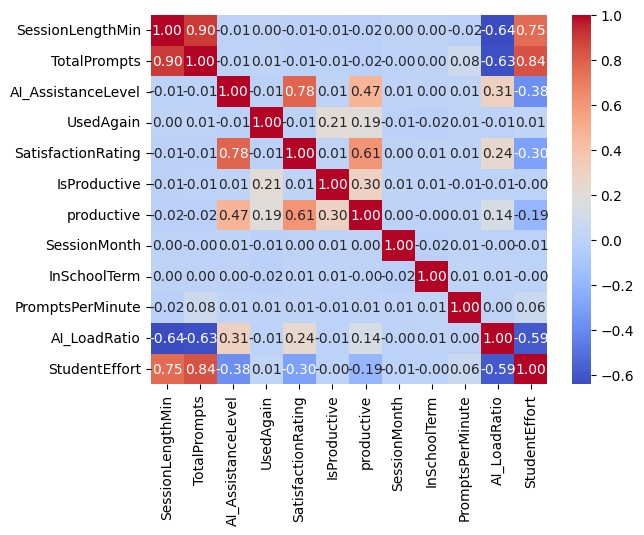

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# 4. Modeling Preparation: Encoding, Scaling, and Train/Test Split


In [11]:
# 1. Load the dataset
df = pd.read_csv('ai_assistant_usage_student_life.csv')

#### 4.1 Target definition and basic cleaning  

We define the final binary `productive` target and ensure key boolean fields (e.g., `UsedAgain`) are numeric.


In [12]:
# Models student productivity as binary: 1 if "Assignment Completed", else 0
df['productive'] = (df['FinalOutcome'] == 'Assignment Completed').astype(int)

# Convert boolean 'UsedAgain' column to numeric (1/0)
df['UsedAgain'] = df['UsedAgain'].astype(int)

#### 4.2 Encoding categorical variables  

We one‑hot encode categorical features like `StudentLevel`, `Discipline`, and `TaskType` for use in ML models.


In [13]:
# Select categorical columns to encode
categorical_cols = ['StudentLevel', 'Discipline', 'TaskType']
# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#### 4.3 Scaling continuous features  
We standardize core numeric features so models are not biased by differences in scale.


In [14]:
# Select continuous features to scale
continuous_features = ['SessionLengthMin', 'TotalPrompts', 'SatisfactionRating', 'AI_AssistanceLevel']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the continuous features
df[continuous_features] = scaler.fit_transform(df[continuous_features])

#### 4.4 Feature set construction and train/test split  

We build the final feature matrix `X`, label vector `y`, and perform an 80/20 stratified train–test split for evaluation.

In [15]:
X = df.drop(columns=['SessionID', 'SessionDate', 'FinalOutcome', 'productive'])
y = df['productive']

# 80/20 stratified train-test split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Output the shapes to verify


In [16]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nFirst 5 rows of processed training data:")
print(X_train.head())

Training set shape: (8000, 18)
Test set shape: (2000, 18)

First 5 rows of processed training data:
      SessionLengthMin  TotalPrompts  AI_AssistanceLevel  UsedAgain  \
8260         -0.994233     -0.991173            0.524827          1   
8780         -0.976963     -0.991173            0.524827          1   
6847         -1.109369     -0.991173            1.533139          1   
4736         -0.953216     -0.991173            1.533139          1   
3648         -0.406320     -0.560930           -0.483486          1   

      SatisfactionRating  StudentLevel_High School  \
8260            0.684193                     False   
8780            1.296469                     False   
6847            1.296469                      True   
4736            1.383937                     False   
3648            0.771661                     False   

      StudentLevel_Undergraduate  Discipline_Business  \
8260                        True                False   
8780                        True  